In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
train_df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

In [3]:
test_df = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [4]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
def plot_features(df, target):
    features = [col for col in df.columns if col != target]
    for feature in features:
        unique_vals = df[feature].nunique()
        if unique_vals < 8:
            plt.figure(figsize=(15,8))
            ax = sns.countplot(x=feature, hue=target, data=df)
            plt.xticks(rotation=90)
            for p in ax.patches:
                value = p.get_height()
                ax.annotate(f'\n{value}', (p.get_x()+.1, p.get_height()+.3), ha='center', va='top', color='black', fontsize=10)
            plt.show()
        else:
            plt.figure(figsize=(15,8))
            if df[feature].dtype == 'float64' or df[feature].dtype == 'int64':
                sns.boxplot(x=target, y=feature, data=df)
            else:
                plt.figure(figsize=(15,8))
                sns.catplot(x=target, y=feature, data=df, kind='violin')
            plt.show()


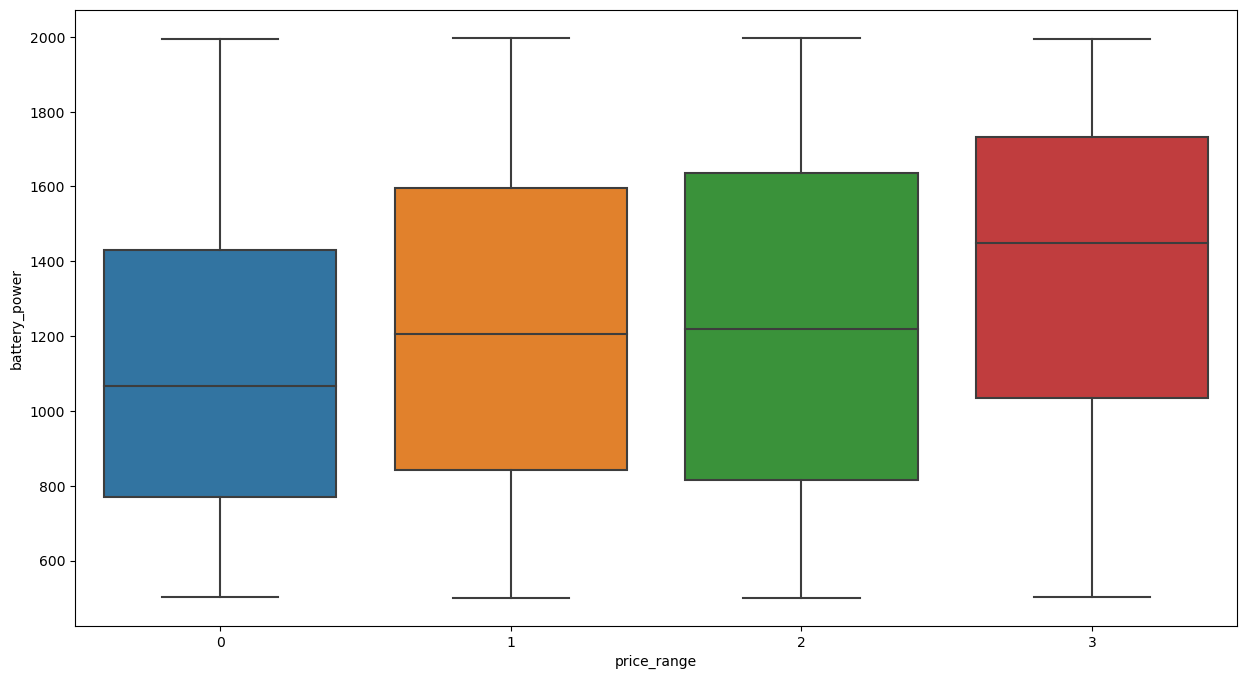

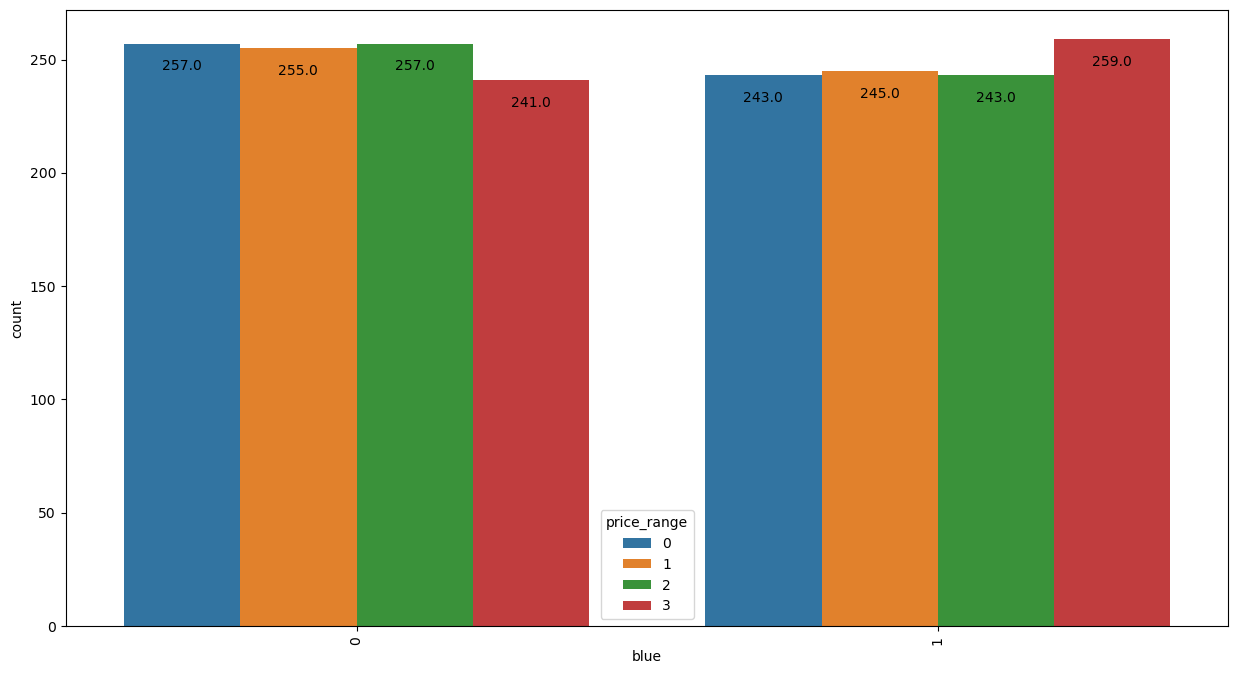

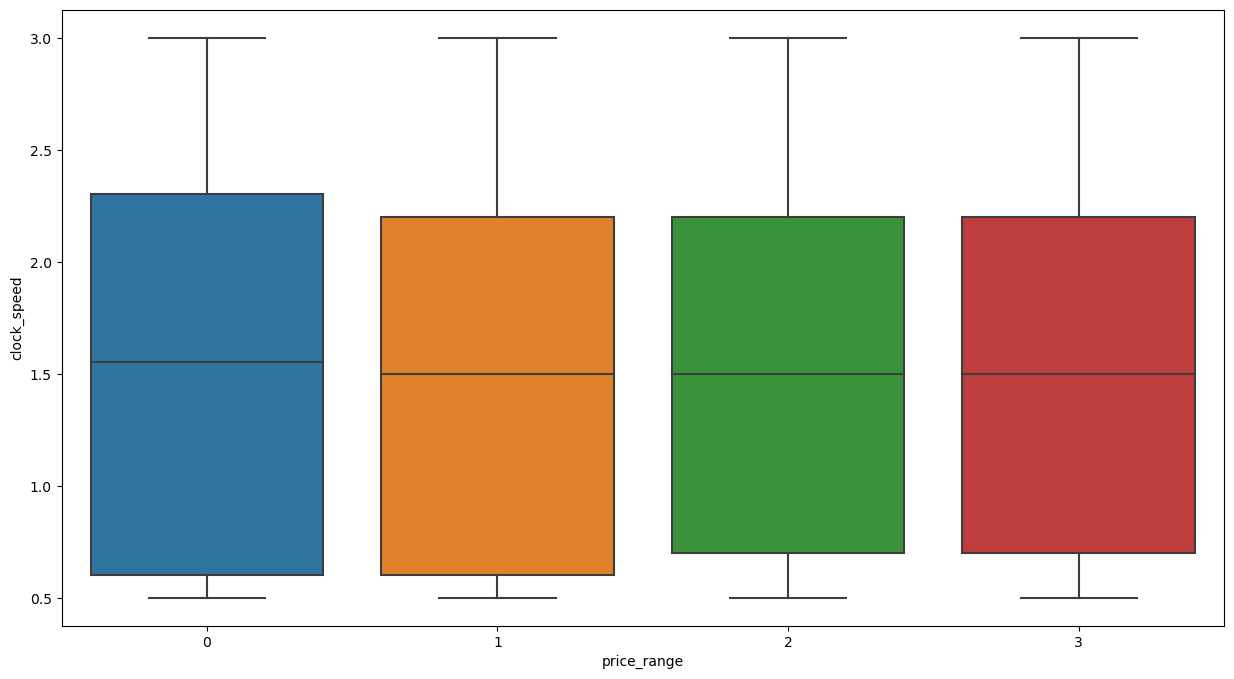

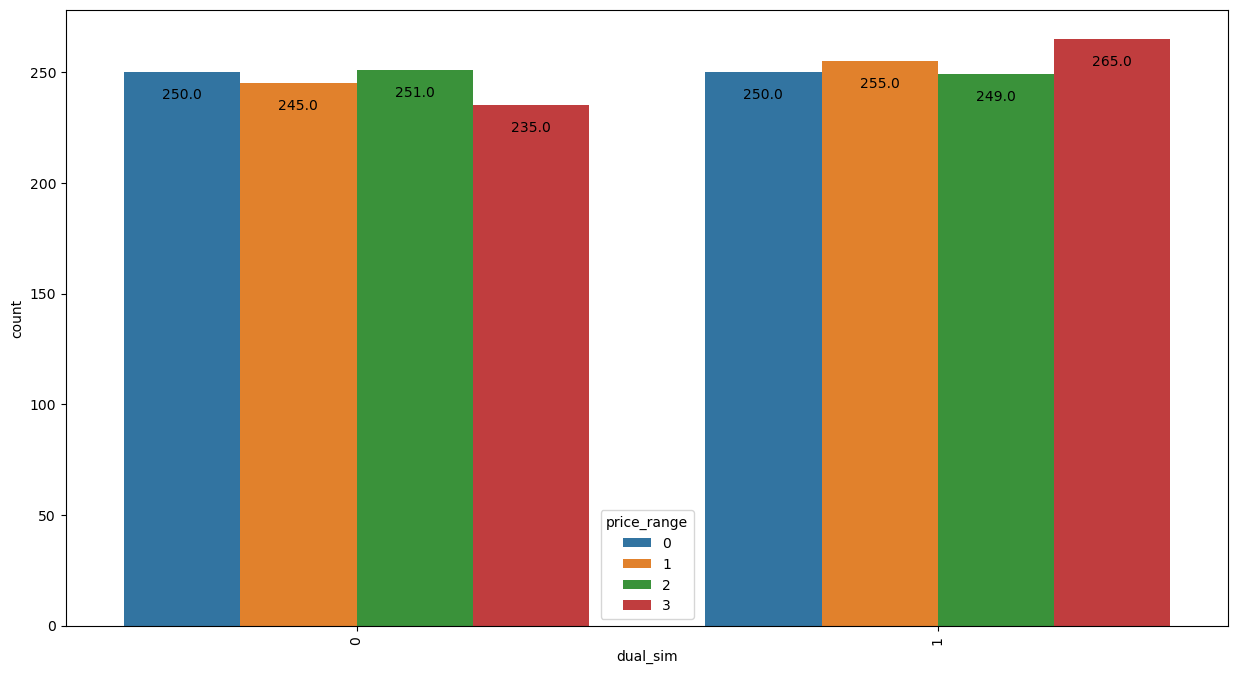

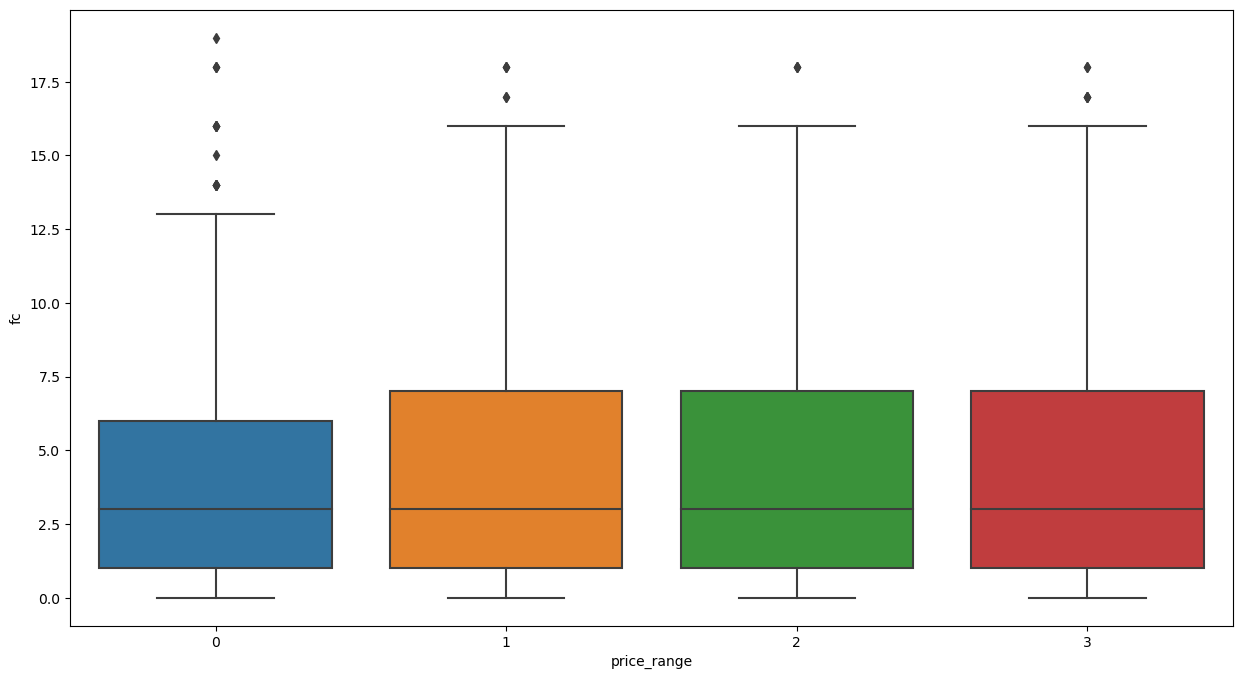

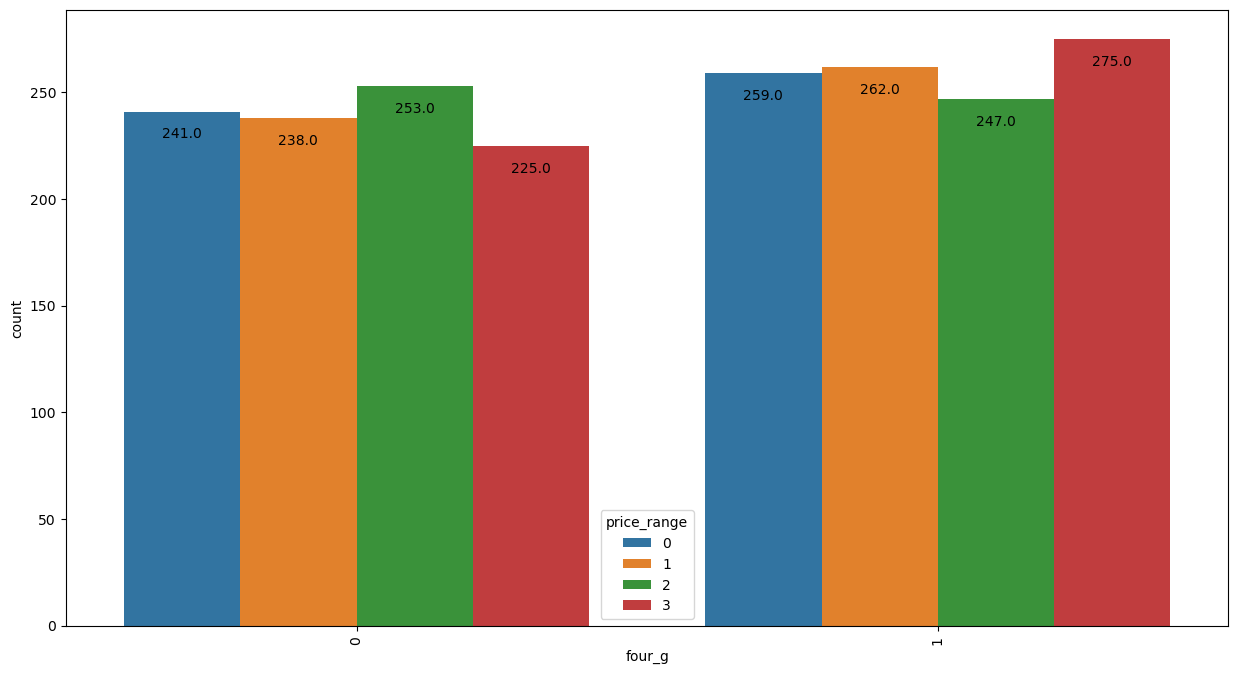

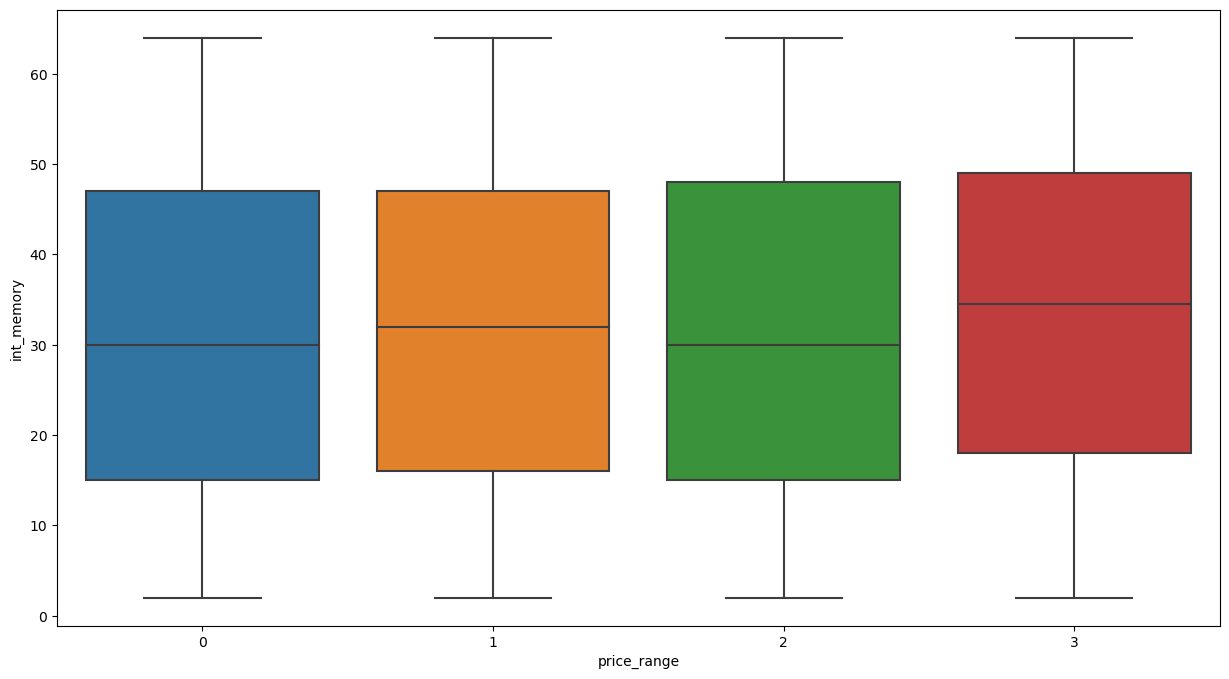

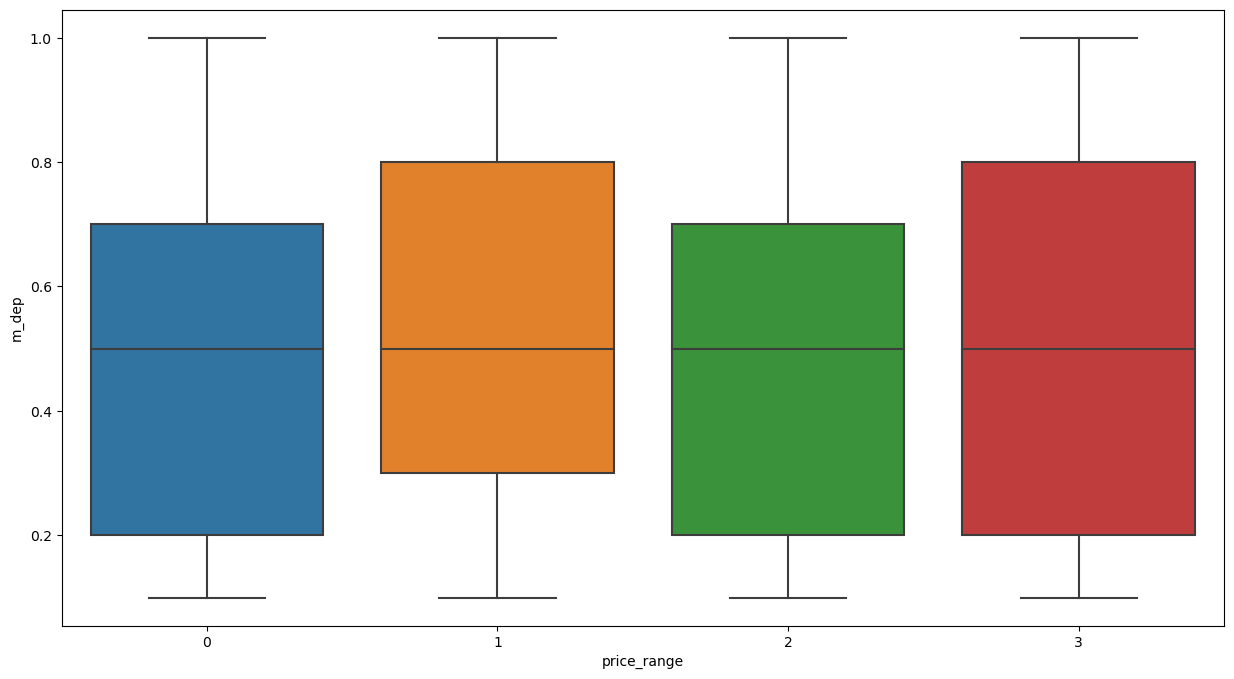

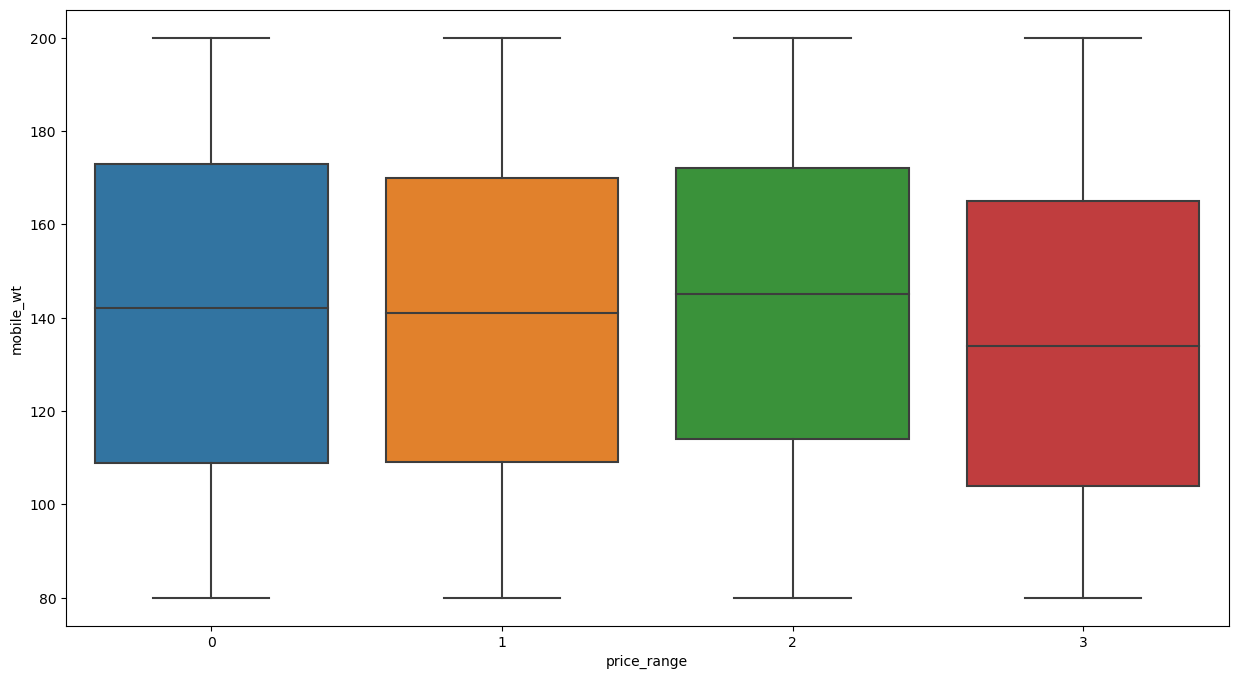

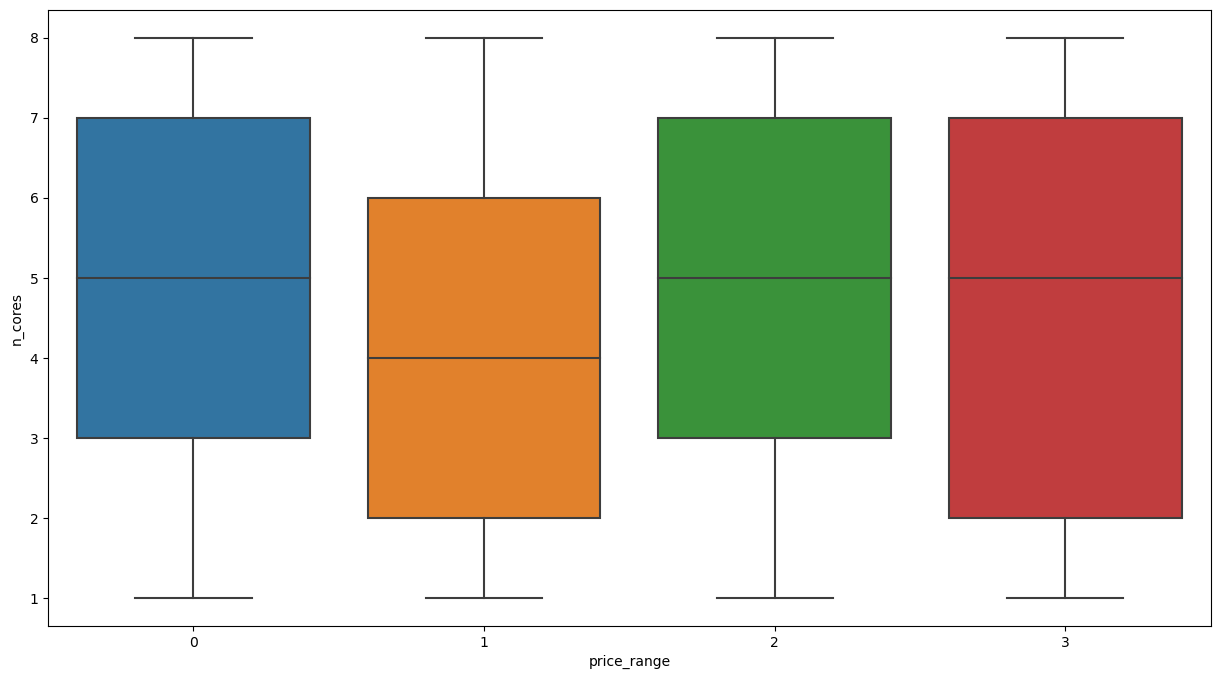

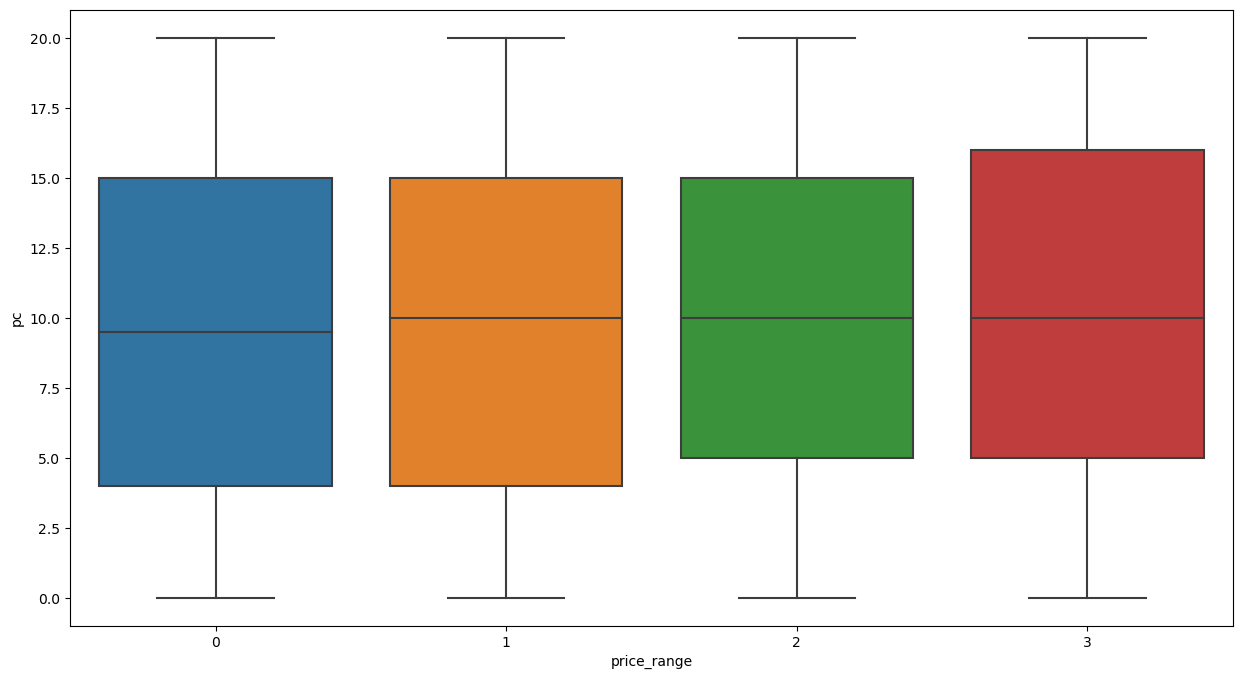

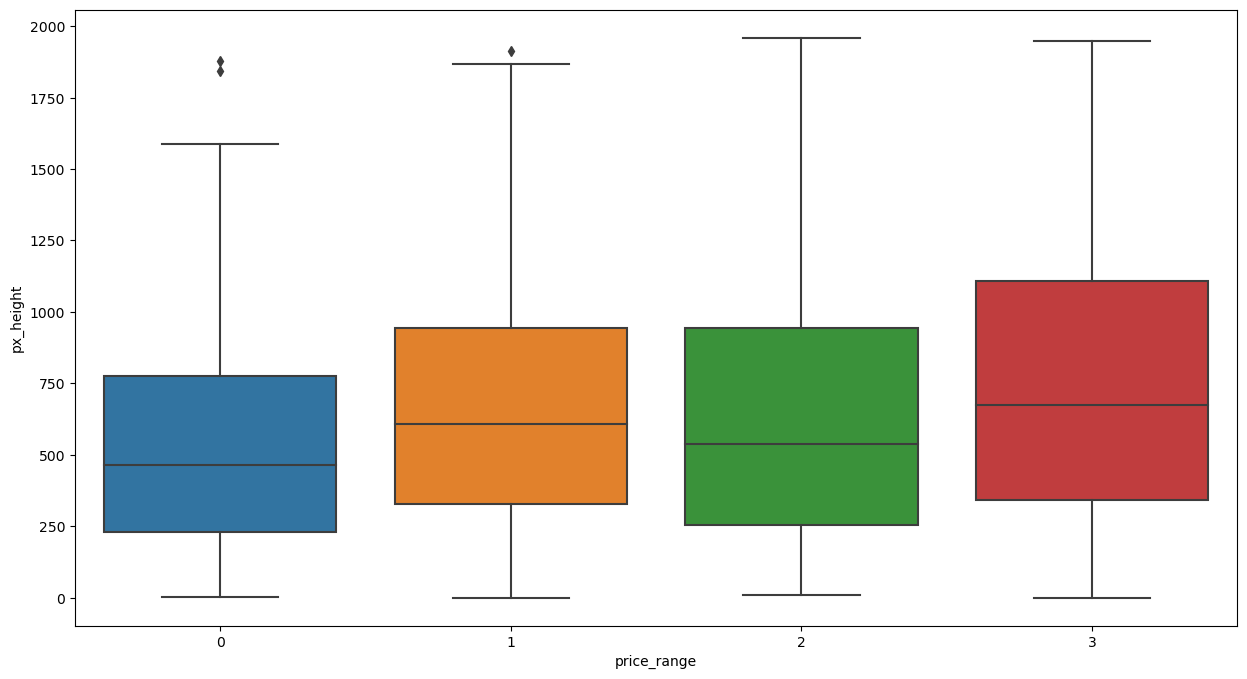

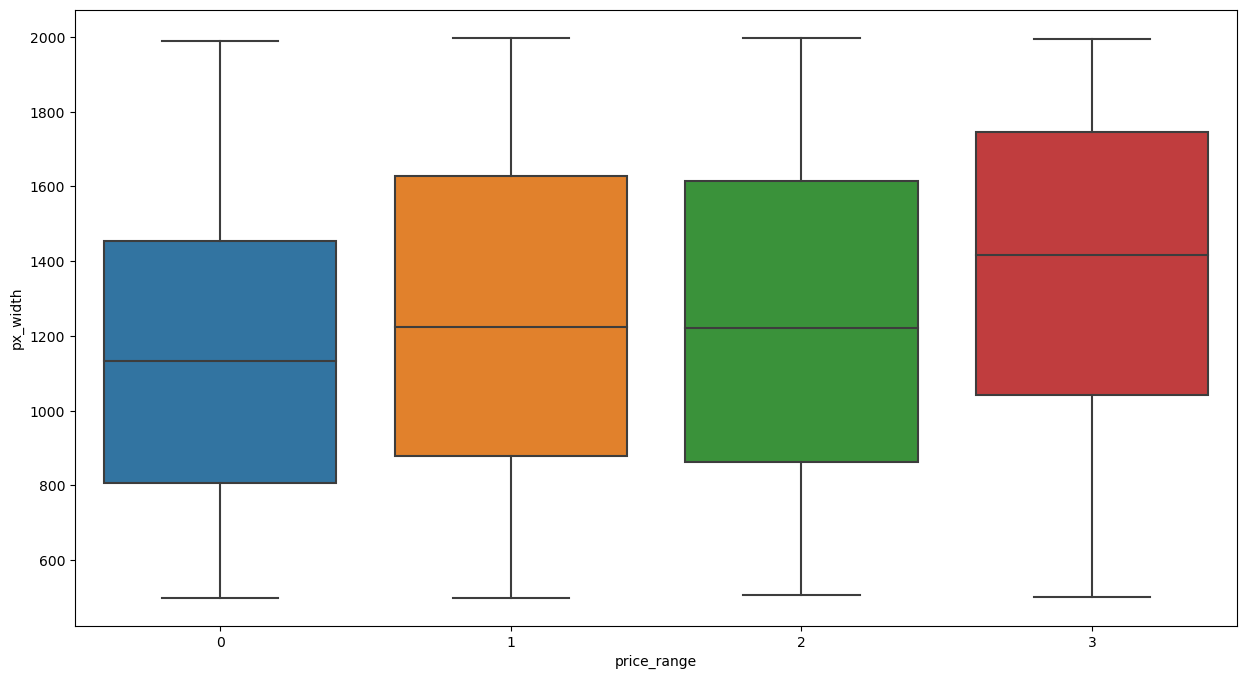

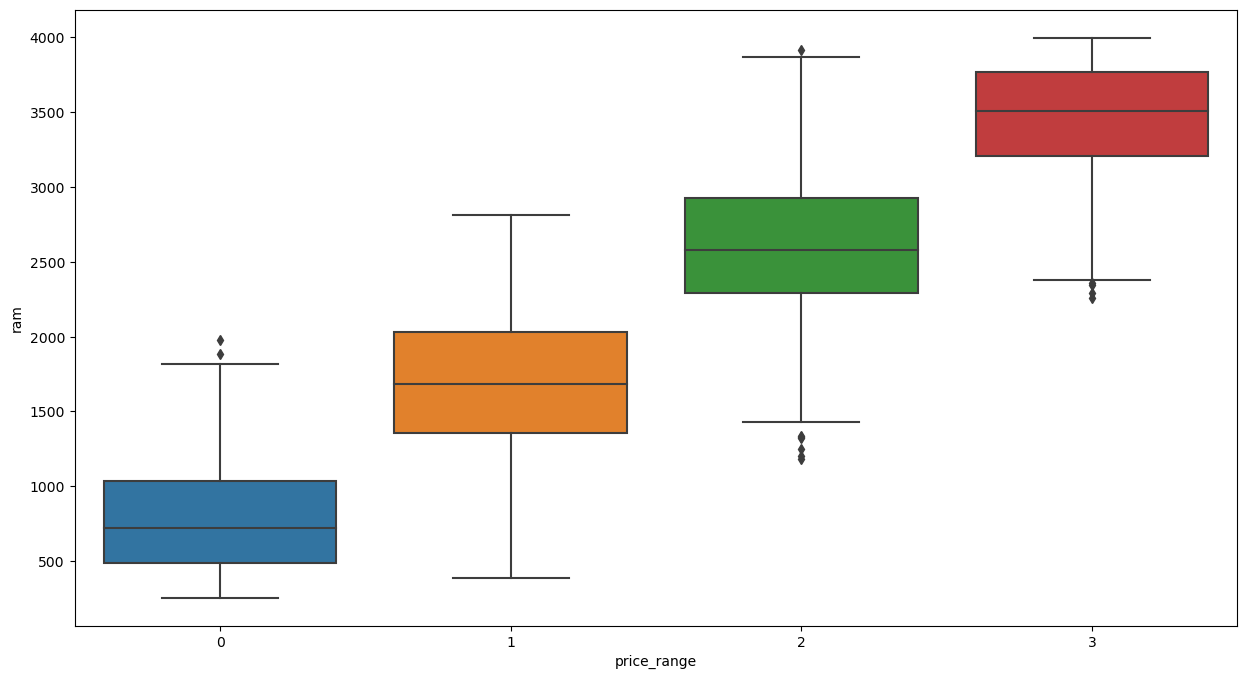

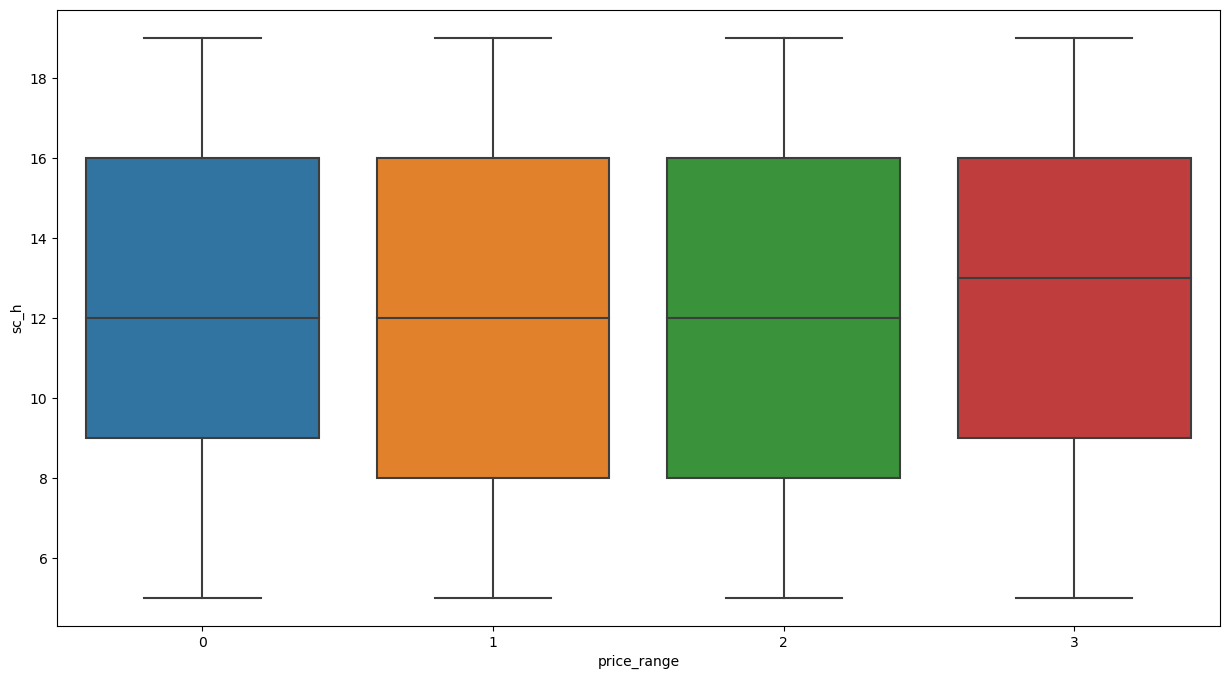

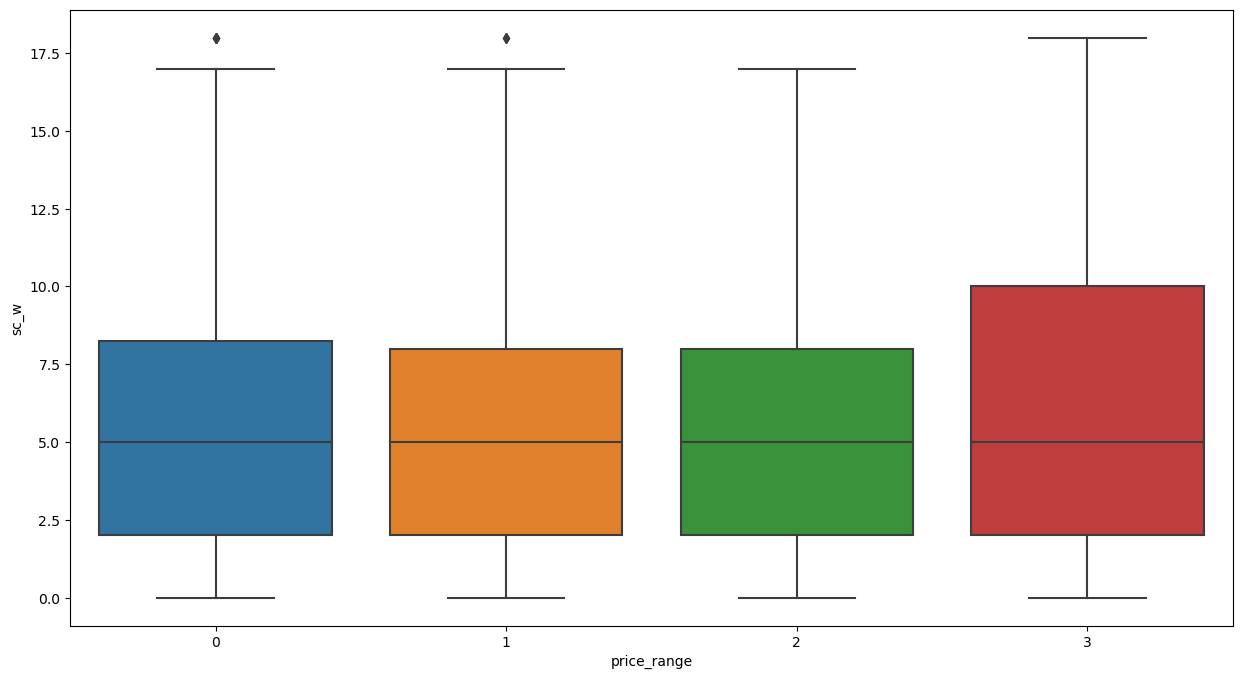

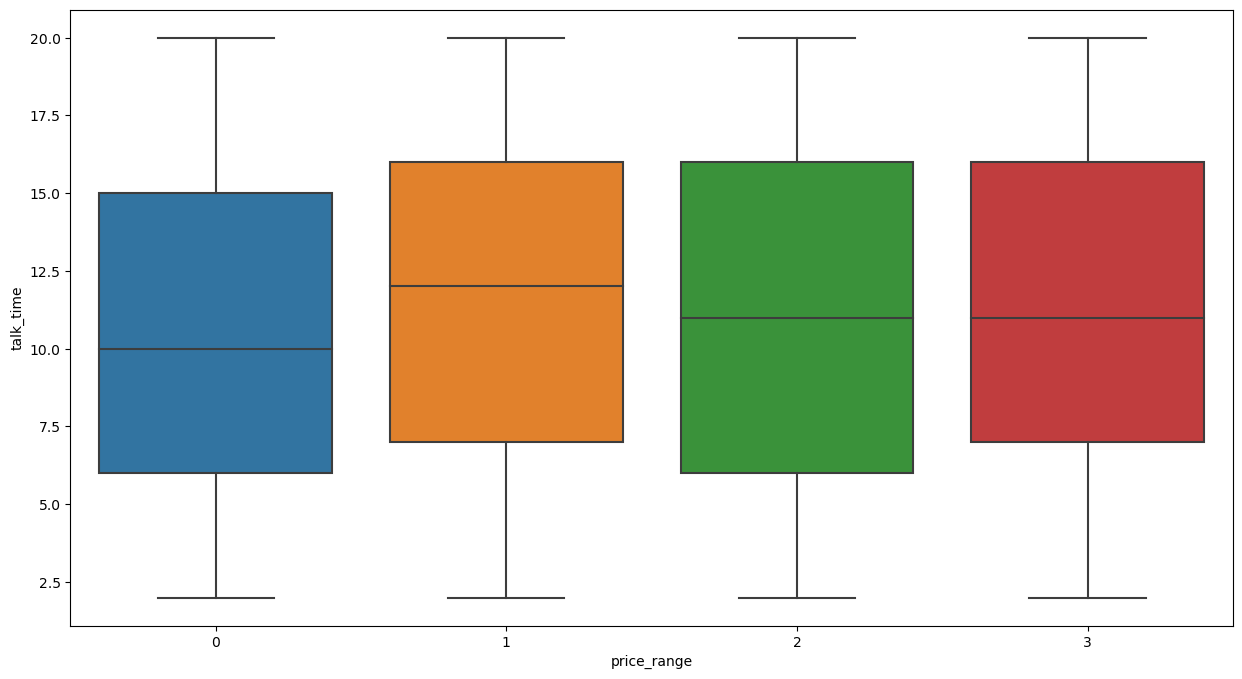

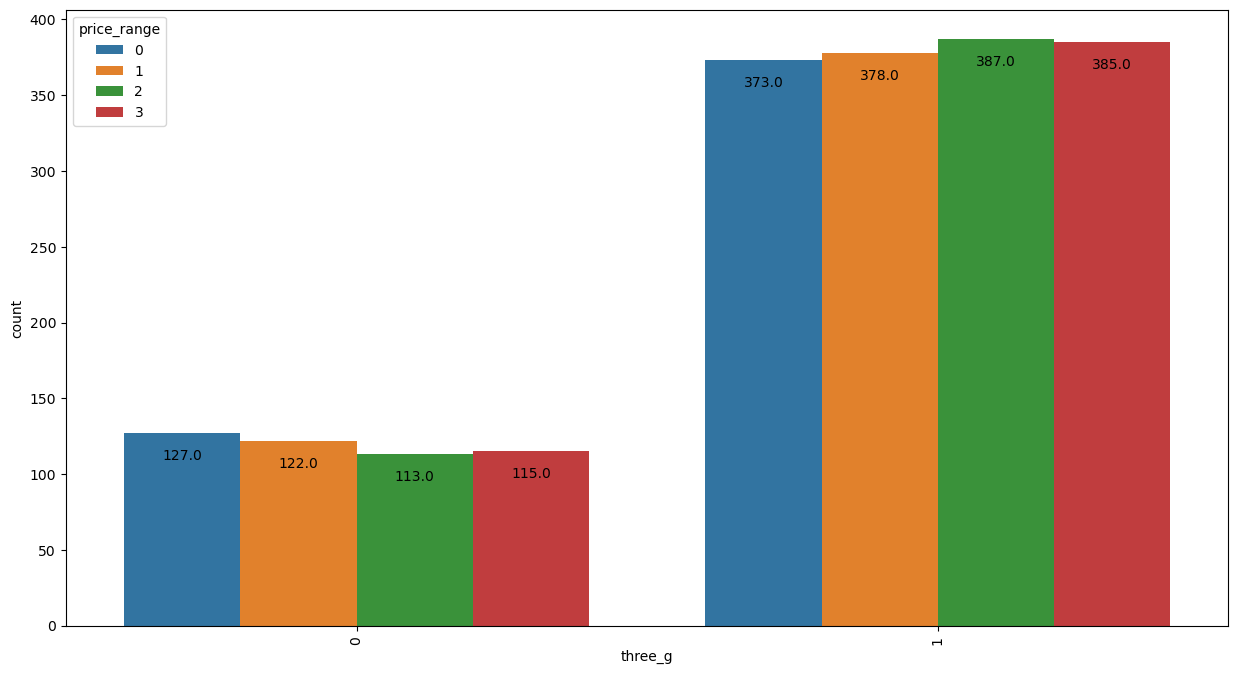

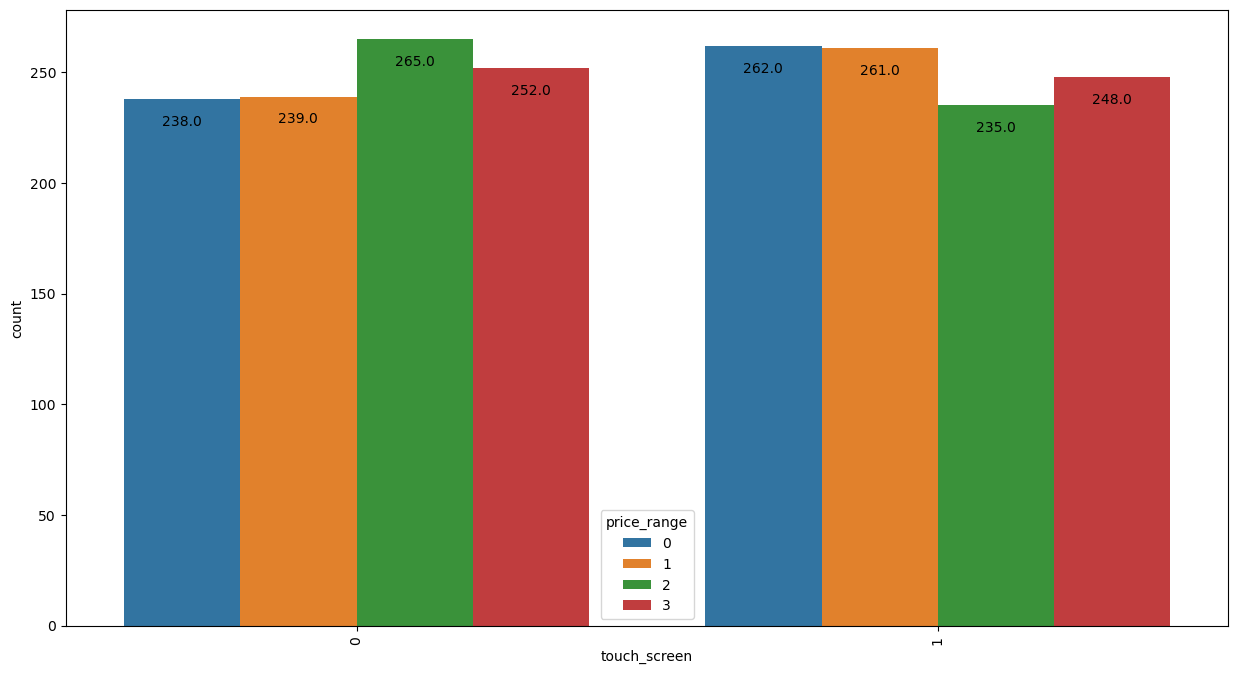

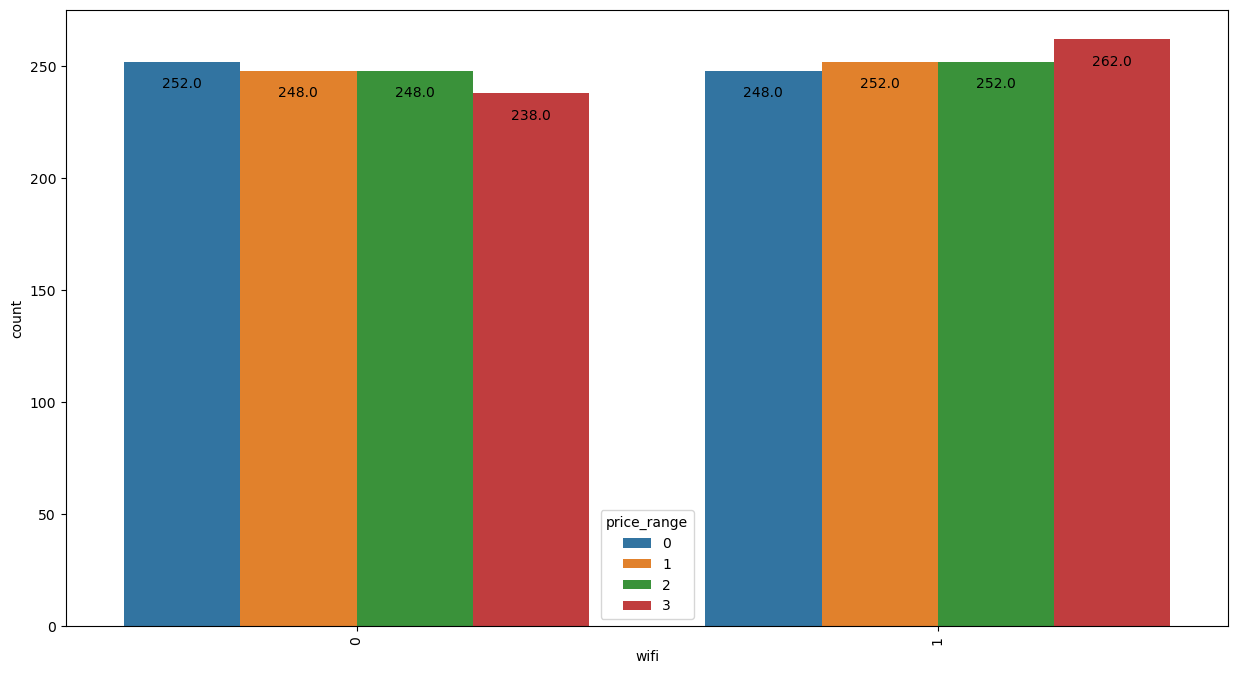

In [7]:
plot_features(train_df,'price_range')

In [8]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
def remove_outliers(df, cols, thresh=1.5):
    df_out = df.copy()
    for col in cols:
        q1 = df_out[col].quantile(0.25)
        q3 = df_out[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - thresh * iqr
        upper = q3 + thresh * iqr
        df_out = df_out[(df_out[col] >= lower) & (df_out[col] <= upper)]
    return df_out


In [10]:
cols = [feature for feature in train_df.columns]
train_df = remove_outliers(train_df,cols)

In [11]:
train_df.shape

(1506, 21)

In [12]:
cols = [col for col in test_df.columns]
test_df = remove_outliers(test_df,cols)

In [13]:
train_df.price_range.value_counts()

2    383
3    380
1    374
0    369
Name: price_range, dtype: int64

<AxesSubplot:ylabel='price_range'>

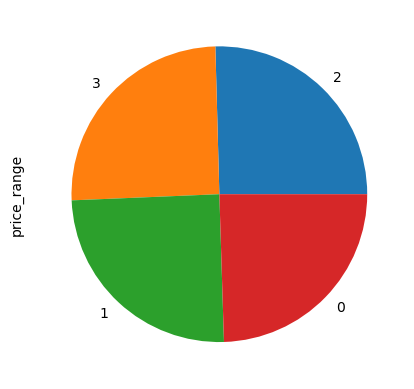

In [14]:
train_df.price_range.value_counts().plot.pie() ### Balanced train data

In [15]:
y = train_df.price_range
x = train_df.drop('price_range',1)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix,r2_score,mean_squared_error
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
test = test_df.drop('id',1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
5,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
8,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0
9,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1


In [18]:
test = np.array(test.values)

In [19]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [20]:
x = np.array(x)
y = np.array(y)

In [21]:
x_train,x_test,val_train,val_test = train_test_split(x,y,test_size=.20,random_state=28)

In [22]:
def normalise(l):
    high = max(l)
    lowered = [v/high for v in l]
    lowered = [v*3 for v in lowered]
    result = []
    for v in lowered:
        if v % 1 > 0.5:
            result.append(int(v)+1)
        else:
            result.append(int(v))
    return result

In [23]:
def whole(l):
    result = []
    for v in l:
        if v % 1 > 0.5:
            result.append(int(v)+1)
        else:
            result.append(int(v))
    return result

In [24]:
results={}

In [25]:
lr = LinearRegression()
lr.fit(x_train,val_train)
pred = lr.predict(x_test)
pred = normalise(pred)
score = r2_score(val_test,pred)
mse = mean_squared_error(val_test,pred)
print('Loss: {} and Accuracy: {}'.format(mse,score))

Loss: 0.4139072847682119 and Accuracy: 0.678977490156727


In [26]:
results['Linear_regression'] = normalise(lr.predict(test))

In [27]:
xgbr = XGBRegressor(n_jobs=-1,n_estimators=200,max_depth=7)
xgbr.fit(x_train,val_train)
pred = xgbr.predict(x_test)
pred = whole(pred)
score = r2_score(val_test,pred)
mse = mean_squared_error(val_test,pred)
print('Loss: {} and Accuracy: {}'.format(mse,score))

Loss: 0.24834437086092714 and Accuracy: 0.8073864940940362


In [28]:
results['XGB_regressor'] = whole(xgbr.predict(test))

In [29]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=7)
rfc.fit(x_train,val_train)
pred = rfc.predict(x_test)
mat = confusion_matrix(val_test,pred)
print('Confusion Matrix: \n',mat)
print('Score: {}'.format(rfc.score(x_test,val_test)))

Confusion Matrix: 
 [[73  3  0  0]
 [13 55  6  0]
 [ 0  9 56  6]
 [ 0  0  7 74]]
Score: 0.8543046357615894


In [30]:
results['Random_forest'] = rfc.predict(test)

In [31]:
xgb = XGBClassifier(n_jobs=-1,n_estimators=200,max_depth=7)
xgb.fit(x_train,val_train)
pred = xgb.predict(x_test)
mat = confusion_matrix(val_test,pred)
print('Confusion Matrix: \n',mat)
print('Score: {}'.format(xgb.score(x_test,val_test)))

Confusion Matrix: 
 [[71  5  0  0]
 [ 7 64  3  0]
 [ 0  5 63  3]
 [ 0  0  6 75]]
Score: 0.9039735099337748


In [32]:
results['XGB_classifier'] = xgb.predict(test)

In [33]:
results = pd.DataFrame(results)

# Final Results:
* With Regressor and
* with Classifier

In [34]:
results

,Linear_regression,XGB_regressor,Random_forest,XGB_classifier
0,3,3,3,3
1,1,3,3,3
2,3,3,3,3
3,2,3,3,3
4,1,3,3,3
...,...,...,...,...
735,0,3,3,3
736,1,3,3,3
737,2,3,3,3
738,1,3,3,3


In [35]:
results.Linear_regression.value_counts()

2    314
1    302
3    111
0     13
Name: Linear_regression, dtype: int64

In [36]:
results.XGB_regressor.value_counts()

3    740
Name: XGB_regressor, dtype: int64

In [37]:
results.Random_forest.value_counts()

3    740
Name: Random_forest, dtype: int64

In [38]:
results.XGB_classifier.value_counts()

3    740
Name: XGB_classifier, dtype: int64